# Deep Learning for Computer Vision using Convolutional Neural Networks

With dense layers applied to images, we have learnt global patterns that can be exploited to make predictions. The main difference with **convolutional** layers, is that we will now learn local patterns. 

These local patterns have two important features:
* They are translation invariant. It does not matter where in the image we see the pattern, the layer will be able to capture it and exploit it. In contrast, for a dense layer, if the same local pattern appears in two different location in the image, it would interpret them as two different patterns.
* Convolutional layers can lear a spatial hierarchy of patterns. Imagine the problem of recognizing a *face*. A first layer would learn something about the *nose*, some other layers about the *eyes*, and so on. The aggregation 

![](./imgs/09_cnn_hierarchy.png)

The input to a convolutional layer is a 3-D tensor: height, width and depth (the channels in the image). For RGB images, depth will be 3, for the *R*ed, *B*lue and *G*reen colors. For a black and white image, depth will be just 1.

Each layer recognizes a patch (subset) of the image, with a specific pattern. When applied to the original input, the layer will filter the rest of the image, highlighting the pattern that has learnt. That is, the layer becomes a **features map**.

## Convolution operation

For a convolutional layer, we need to decide the size of the patches (commonly, 3x3), and the depth of the output of the feature map (it is no longer 3, and in fact, it will be a number larger than that -- 16, 32, 64). The output will be another tensor, that is the input to the next layers. These tensors will no longer be images; that is, 3D tensors with a depth of 3, etc. To transform the output into a spatial tensor, we can use padding (adding additional rows or columns).

![](./imgs/10_convolution.png)

### Padding

The convolution operation will slide through the image, trying to cover different zones, to extract common patterns found in different locations. In the edges of the image, the layer will not be able to extract patches, because the regions will be smaller than the patch size. With padding, we make it possible for the layer to extract patches even in the edges of the image, thus using that part of the image too to try to identify a common pattern.

###  Stride

Another parameter that we must take into account is *striding*. The patches can overlap with other patches. The distance between two windows used to extract patches is called **stride**. For instance, with a patch size of 3x3, and a stride of 3, patches will not overlap. We will normally will try to avoid overlapping in the windows extracting the patches; unless that during the training and validation process, we need to change the parameters to obtain a better model.

### Pooling

In a network, we need to partially reduce the dimension of the data, layer after layer, so we can learn at the output layer a number, a vector of a certain size, etc. The convolution operation is in fact increasing the size of the output. How do we do reduce the size of the output learnt in each layer? By **pooling**.

The most typical pooling operation is *max pooling*. For each patch learnt in the layer, we apply a window of 2x2 or less (smaller than the striding window), and then apply the max operation. For each 2x2 possible window, we keep the max in that window. This way, we are reducing the size of the patches, and the size of the output of the layer. By doing this reduction in the size of the output, we will also help the network to build a hierarchy of patterns.

Other pooling operations are also possible: averaging, in different ways. For full details of what pooling operations are available in Keras see https://keras.io/layers/pooling/

## Additional readings/videos

* How CNNs work: https://www.youtube.com/watch?v=FmpDIaiMIeA
* Deep Learning demystified: http://brohrer.github.io/deep_learning_demystified.html
* Hot-dog? No hot-dog? http://mateos.io/blog/getting-some-hotdogs/

# Common functions and download data



In [1]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

In [3]:
!pip install keras

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [6]:
!ls

adc.json  sample_data


In [0]:
file_id = '1nL7cgXGkNGS79FORsrCfrfcpzrBtoX8K'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("train.zip")

file_id = '1edO-psKzj7gpYgf5PcDKyPgbFFJN09D3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("test1.zip")

In [8]:
!ls -hs

total 815M
4.0K adc.json  4.0K sample_data  272M test1.zip  544M train.zip


In [9]:
!mkdir dogs_cats
!cd dogs_cats && unzip -q ../train.zip
!cd dogs_cats && unzip -q ../test1.zip
!ls -hl dogs_cats

total 1.1M
drwxr-xr-x 2 root root 288K Sep 20  2013 test1
drwxr-xr-x 2 root root 756K Sep 20  2013 train


In [0]:
original_dataset_dir="/content/dogs_cats/train/"

import os, shutil

base_dir = "/content/dogs_cats_small"


train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")


train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_dogs_dir = os.path.join(validation_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")

test_dogs_dir = os.path.join(test_dir, "dogs")
test_cats_dir = os.path.join(test_dir, "cats")

In [0]:
!rm -rf dogs_cats_small/
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(test_cats_dir)

In [13]:
!find dogs_cats_small

dogs_cats_small
dogs_cats_small/test
dogs_cats_small/test/cats
dogs_cats_small/test/dogs
dogs_cats_small/train
dogs_cats_small/train/cats
dogs_cats_small/train/dogs
dogs_cats_small/validation
dogs_cats_small/validation/cats
dogs_cats_small/validation/dogs


In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst) 

In [17]:
!find dogs_cats_small/ | head

# Esta estructura es la que require keras. Una carpeta por test/train/eval y 
# tantos subdirectorios como clases a clasificar

dogs_cats_small/
dogs_cats_small/test
dogs_cats_small/test/cats
dogs_cats_small/test/cats/cat.1831.jpg
dogs_cats_small/test/cats/cat.1989.jpg
dogs_cats_small/test/cats/cat.1574.jpg
dogs_cats_small/test/cats/cat.1564.jpg
dogs_cats_small/test/cats/cat.1784.jpg
dogs_cats_small/test/cats/cat.1966.jpg
dogs_cats_small/test/cats/cat.1516.jpg


In [16]:
# Check if we have a GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11179111808111464063, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281989632
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3976611435510723708
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

# Prepare data

Because we are dealing with large images, we cannot just read them in a Numpy array. We will use generators, to consume the images as they are needed by the network.

In [0]:
from keras.preprocessing import image

In [19]:
image.ImageDataGenerator 

keras.preprocessing.image.ImageDataGenerator

In [0]:
train_datagen = image.ImageDataGenerator(rescale=1./255.0)
test_datagen = image.ImageDataGenerator(rescale=1./255.0)
validation_datagen = image.ImageDataGenerator(rescale=1./255.0)

In [0]:
# Los generadores una vez que se usan se agotan !!!! 

In [52]:
train_gen = train_datagen.flow_from_directory(
  train_dir,
  target_size=(100,100), # esto es muy importante. Todas tienen que tener el mismo tamaño
   batch_size=100,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [53]:
test_gen = test_datagen.flow_from_directory(
  test_dir,
  target_size=(100,100), # esto es muy importante. Todas tienen que tener el mismo tamaño
   batch_size=100,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [54]:
validation_gen = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(100,100), # esto es muy importante. Todas tienen que tener el mismo tamaño
   batch_size=100,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [55]:
type(validation_gen)

keras.preprocessing.image.DirectoryIterator

In [0]:
# sino se dice nada, el padding por defecto hace copias 

# Build model

In [0]:
from keras import models
from keras import layers

In [0]:
m = models.Sequential()
m.add(layers.Conv2D(32, (3,3), input_shape=(100,100,3), activation='relu')) # en imágenes el tamaño de los parches de 3x3 es muy típico
m.add(layers.MaxPooling2D((2,2)))
m.add(layers.Conv2D(64, (3,3), activation='relu')) # la función de convolución es lineal, por eso hace falta la funcion de activacion
m.add(layers.MaxPooling2D((2,2)))
m.add(layers.Flatten())
m.add(layers.Dense(256, activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# Se suelen usar potencias de 2 por intentar aprovechar al máximo la memoria del GPU

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

In [0]:
m.compile (
  optimizer=optimizers.rmsprop(),
  loss=losses.binary_crossentropy,
  metrics=[metrics.binary_accuracy]
)

In [62]:
h = m.fit_generator(train_gen, epochs=10, steps_per_epoch=20, # cada acceso a disco va a ser steps_per_epoch * batch_size 
                   validation_data=validation_gen,
                   validation_steps=10) # usará 500 imagenes en cada época

Epoch 1/10
20/20 [==============================] - 11s 534ms/step - loss: 0.7861 - binary_accuracy: 0.5085 - val_loss: 0.6835 - val_binary_accuracy: 0.6190
Epoch 2/10
20/20 [==============================] - 8s 391ms/step - loss: 0.6883 - binary_accuracy: 0.5825 - val_loss: 0.6604 - val_binary_accuracy: 0.6470
Epoch 3/10
20/20 [==============================] - 8s 406ms/step - loss: 0.6494 - binary_accuracy: 0.6550 - val_loss: 0.8411 - val_binary_accuracy: 0.5280
Epoch 4/10
20/20 [==============================] - 8s 397ms/step - loss: 0.5911 - binary_accuracy: 0.7045 - val_loss: 0.6153 - val_binary_accuracy: 0.6580
Epoch 5/10
20/20 [==============================] - 8s 389ms/step - loss: 0.6097 - binary_accuracy: 0.7215 - val_loss: 0.6032 - val_binary_accuracy: 0.6880
Epoch 6/10
20/20 [==============================] - 8s 388ms/step - loss: 0.4842 - binary_accuracy: 0.7875 - val_loss: 0.6853 - val_binary_accuracy: 0.6490
Epoch 7/10
20/20 [==============================] - 8s 391ms/st

In [63]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               8667392   
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
__________

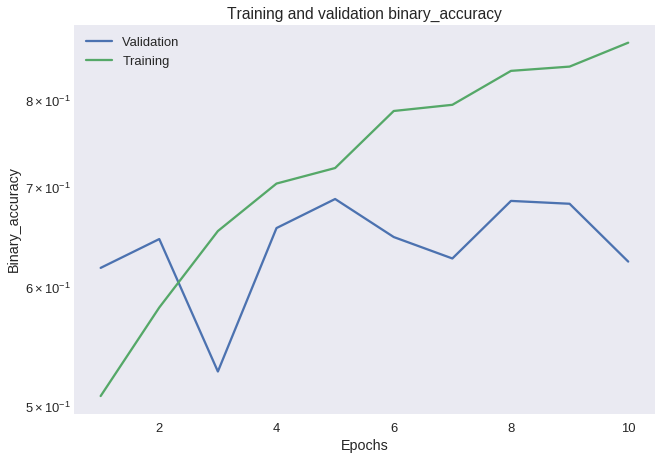

In [74]:
# de 100*100 pasa a 98*98 por el padding (no se multiplo de 3)
plot_metric(h, 'binary_accuracy')

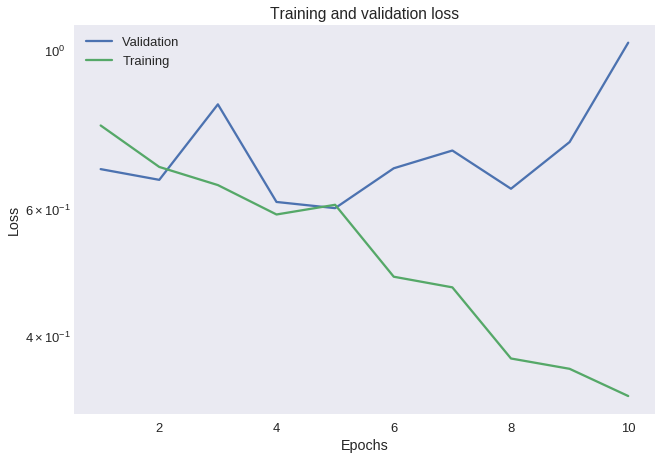

In [65]:
plot_metric(h, 'loss')

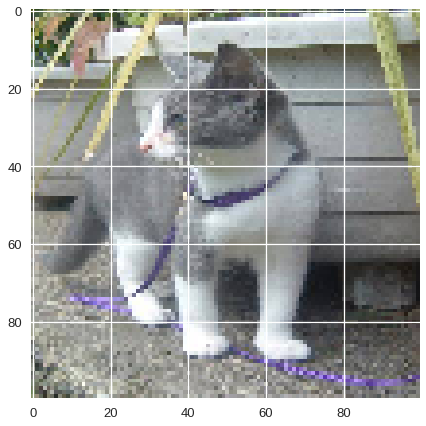

In [73]:
N = 25
plt.imshow(test_gen[0][0][N])

In [0]:
# 100 imagenes, de 100*100, de 3 colores

In [70]:
test_gen[0][0][N]

array([[[0.25882354, 0.18431373, 0.1254902 ],
        [0.1254902 , 0.07450981, 0.03921569],
        [0.38823533, 0.36862746, 0.3529412 ],
        ...,
        [0.4666667 , 0.50980395, 0.53333336],
        [0.4156863 , 0.43529415, 0.41176474],
        [0.3803922 , 0.3803922 , 0.3803922 ]],

       [[0.53333336, 0.49803925, 0.47058827],
        [0.6901961 , 0.67058825, 0.654902  ],
        [0.7137255 , 0.7137255 , 0.7058824 ],
        ...,
        [0.15686275, 0.16470589, 0.16078432],
        [0.19215688, 0.15686275, 0.12156864],
        [0.3137255 , 0.21568629, 0.227451  ]],

       [[0.67058825, 0.69411767, 0.69411767],
        [0.67058825, 0.7058824 , 0.7019608 ],
        [0.59607846, 0.627451  , 0.63529414],
        ...,
        [0.08627451, 0.03529412, 0.00392157],
        [0.07058824, 0.01176471, 0.        ],
        [0.12941177, 0.09803922, 0.08627451]],

       ...,

       [[0.08235294, 0.17254902, 0.38431376],
        [0.07450981, 0.16470589, 0.37647063],
        [0.09803922, 0

In [69]:
m.predict(test_gen[0][0][N:N+1])

array([[0.00796833]], dtype=float32)

# Evaluate model

Our model is a binary classifier. We can evaluate it as any other classifier.

**EXERCISE 1**. Obtain the confusion matrix and associated metrics (precision, recall, F-score) for this classifier.

**EXERCISE 2**. Plot the ROC curve and calculate the AUC score.

**EXERCISE 3**. What is the best model you can obtain using the above evaluation parameters?


In addition to this evaluation, for convolutional layers, we can attempt to plot each layer, applied to a image, to see what are the elements used by the model to find out the class the item belongs to.

# Data augmentation

If we don't have enough images to train our model, we can manipulate our images to produce modifications, and to *augment* the training data.

Because images are slightly different, this can help the network to learn some of the patterns better.

See https://keras.io/preprocessing/image/


# Reusing a pre-trained convnet

Training a convolutional network is slow and tedious. And if we think of every day objects, some patterns will probably be useful for images of different types.

Similarly to word2vec, Glove, and other pre-trained word embeddings, we can use pre-trained convolutional networks, to improve our models.

In [0]:
from keras.applications import VGG16

In [76]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

58892288/58889256 [==============================] - 22s 0us/step


In [78]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [79]:
conv_base.trainable

True

In [0]:
conv_base.trainable = False

In [0]:
m = models.Sequential()
m.add(conv_base)
m.add(layers.Flatten())
m.add(layers.Dense(256, activation='relu'))
m.add(layers.Dense(128, activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(1, activation='sigmoid'))

In [0]:
m.compile(
optimizer=optimizers.rmsprop(),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy]
)

In [0]:
h = m.fit_generator(train_gen, epochs=20, steps_per_epoch)

# Exercise

In our classification problem, dogs are the *positive* case, and cats the *negative* (it could not be otherwise...).

Obtain the ROC curve for the following classifiers:
 
* Dense network
* Convolutional layers
* Convolutional layers with training data augmentation
* Convolutional layers, using a pre-trained network, letting your network modify the weights
* Convolutional layers, using a pre-trained network, with all the weights frozen

Which one is the best classifier? Why?